Gymnasium provides us with multiple environments/games to try out Reinforcement Learning Algorithms. It also provides us with many functions to make the process easy.

In [ ]:
!pip install gymnasium

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
env = gym.make('FrozenLake-v1', is_slippery=True)  #check by doing is_slippery=False

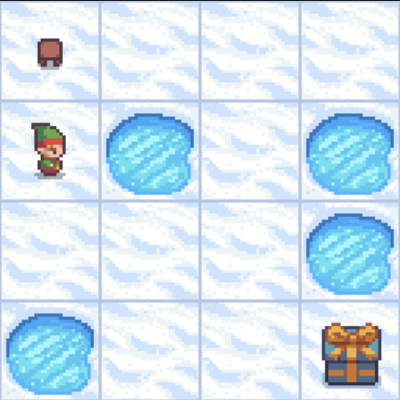

In [ ]:
print(env.action_space) # env.action_space tells us about the possible actions we can take.

Discrete(4)


In [ ]:
env.observation_space # env.observation_space tells us about the total number of states in our environment.

Discrete(16)

In [ ]:
Q = np.zeros((env.observation_space.n, env.action_space.n)) # The Q-Function takes the (state, action) and returns the cummulative reward.
num_train_steps = 30000 # How many episodes should our model train for.
max_steps = 100 # In some games there is a possibility of the agent getting stuck making no valuable progress, to avoid this we limit the number of steps.
eps = 1 # epsilon or the exploration rate.
learning_rate = 0.03 # weight given to a new value as compared to a previous value at the time of Q-value updates.
decay_rate = 0.005 # The rate at which eps is exponentially decreased so as to make our agent exploit its calculations more.
gamma = 0.99 # Discount Factior

From a particular state(S) taking the action(a), we get some reward(r) and get to a new state(S').

As we want our Q-value to be optimal, we consider our next move to be optimal.

New Q-value := reward + gamma * max(Q-value of the next state)

But we have a learning rate.
So,
New Q-value is a weighted average of new and previous value.

Weight given to new-value is α and weight given to old value is 1 - α

In [ ]:
for step in range(1, num_train_steps + 1):
  state = env.reset()[0] # env.reset()[0] returns back the starting state, restarts our game.
  for step in range(1, max_steps + 1):

    if np.random.uniform(0,1) > eps: # We take optimal action with probability 1-eps.
      action = np.argmax(Q[state])
    else:
      action = env.action_space.sample() # We take random action with probability eps.

    new_state, reward, turncated, terminated, info = env.step(action) # env.step(a) returns the new_state and the single step reward.

    Q[state][action] = (1 - learning_rate) * Q[state][action] + learning_rate * (reward + gamma * np.max(Q[new_state][:]))
    if turncated or terminated: # termination-> a terminal/end state has been reached, truncation-> ending due to some other reason like some time limit.
      break

    state = new_state

  eps = np.exp(-decay_rate * step) # Decreasing epsilon exponentially

In [ ]:
Q

array([[0.50288646, 0.48932122, 0.48910329, 0.48325102],
       [0.29655367, 0.29024275, 0.33004488, 0.45974082],
       [0.39527883, 0.39496645, 0.38191396, 0.41525412],
       [0.29397746, 0.2795532 , 0.23840544, 0.39535926],
       [0.51804443, 0.39203254, 0.35406994, 0.28587306],
       [0.        , 0.        , 0.        , 0.        ],
       [0.28790747, 0.21440142, 0.33060497, 0.11079287],
       [0.        , 0.        , 0.        , 0.        ],
       [0.35798515, 0.41522436, 0.31130964, 0.55944783],
       [0.42943513, 0.61357786, 0.44644831, 0.322868  ],
       [0.59019854, 0.43743929, 0.41234003, 0.32972702],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.44070519, 0.49475806, 0.71479435, 0.49016994],
       [0.70161952, 0.88122126, 0.85003265, 0.76913317],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
rewards = np.zeros(1000) # We test for a 1000 episodes, in a similar fashion.

In [ ]:
for test in range(1000):
  state, info = env.reset()
  cur_reward = 0
  for step in range(max_steps):
    action = np.argmax(Q[state][:]) # We always take the recomended action
    new_state, reward, turncated, terminated, info = env.step(action)
    cur_reward += reward
    if turncated or terminated:
      break
    state = new_state
  rewards[test] = cur_reward # The total reward from each episode is stored.

In [ ]:
np.mean(rewards) # Average reward

0.717

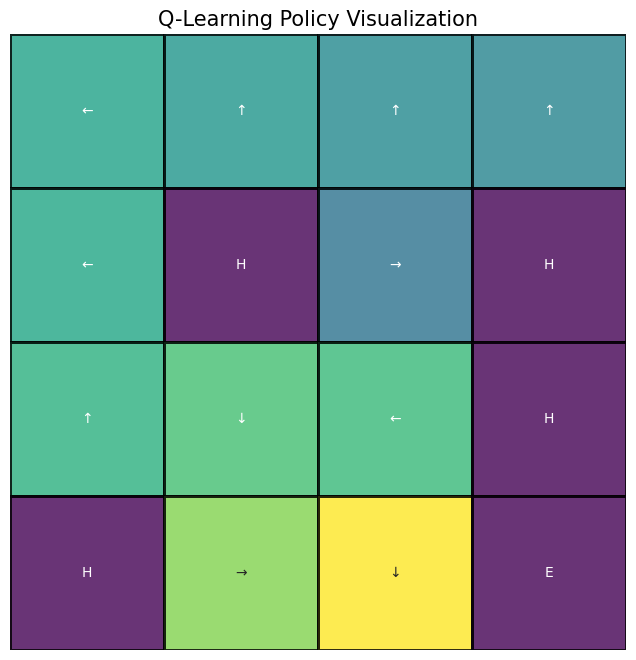

In [ ]:
hole_positions = [(1, 1), (1, 3), (2, 3), (3, 0)]  # Hole Positions based on the image
endpoint_position = (3, 3)  # The ending position

grid_size = int(np.sqrt(len(Q))) # Complicates way to find grid_size(sqrt(NxN))
policy_grid = np.full((grid_size, grid_size), '')

actions = ['←', '↓', '→', '↑']  # Left, Down, Right, Up

for state in range(len(Q)):
    row, col = divmod(state, grid_size) # Returns state / grid_size and state % grid_size or the row and column number
    best_action = np.argmax(Q[state]) # Recomended step
    policy_grid[row, col] = actions[best_action]
    if (row, col) in hole_positions:
        policy_grid[row, col] = 'H'  # Hole
    elif (row, col) == endpoint_position:
        policy_grid[row, col] = 'E'  # Endpoint

background = np.max(Q, axis=1).reshape(grid_size, grid_size)

plt.figure(figsize=(8, 8))
sns.heatmap(background, annot=policy_grid, fmt='', cmap='viridis', cbar=False,
            linewidths=1, linecolor='black', square=True, alpha=0.8)

plt.title('Q-Learning Policy Visualization', fontsize=15)
plt.xticks([])
plt.yticks([])
plt.show()
